**SC5002 Lab3 **

In [ ]:
#Original dataset:
customers = {
    "C1": {"Annual Income": 15, "Spending Score": 39},
    "C2": {"Annual Income": 16, "Spending Score": 81},
    "C3": {"Annual Income": 17, "Spending Score": 6},
    "C4": {"Annual Income": 18, "Spending Score": 77},
    "C5": {"Annual Income": 19, "Spending Score": 40},
    "C6": {"Annual Income": 20, "Spending Score": 76},
    "C7": {"Annual Income": 21, "Spending Score": 6},
    "C8": {"Annual Income": 22, "Spending Score": 94},
    "C9": {"Annual Income": 23, "Spending Score": 15},
    "C10": {"Annual Income": 24, "Spending Score": 73},
    "C11": {"Annual Income": 25, "Spending Score": 88},
    "C12": {"Annual Income": 26, "Spending Score": 17},
    "C13": {"Annual Income": 27, "Spending Score": 40},
    "C14": {"Annual Income": 28, "Spending Score": 55},
    "C15": {"Annual Income": 29, "Spending Score": 82},
    "C16": {"Annual Income": 30, "Spending Score": 20},
    "C17": {"Annual Income": 31, "Spending Score": 79},
    "C18": {"Annual Income": 32, "Spending Score": 35},
    "C19": {"Annual Income": 33, "Spending Score": 83},
    "C20": {"Annual Income": 34, "Spending Score": 30}
}


Tasks 1: Apply K-Means with k=3 and k=5:
  
  (1)Run the clustering algorithm on the dataset.
  
  (2)Visualize the clusters with different colors in a 2D scatterplot(X=Income,
Y=Score).

  (3)Compare results between k=3 and k=5.(Showed on report)

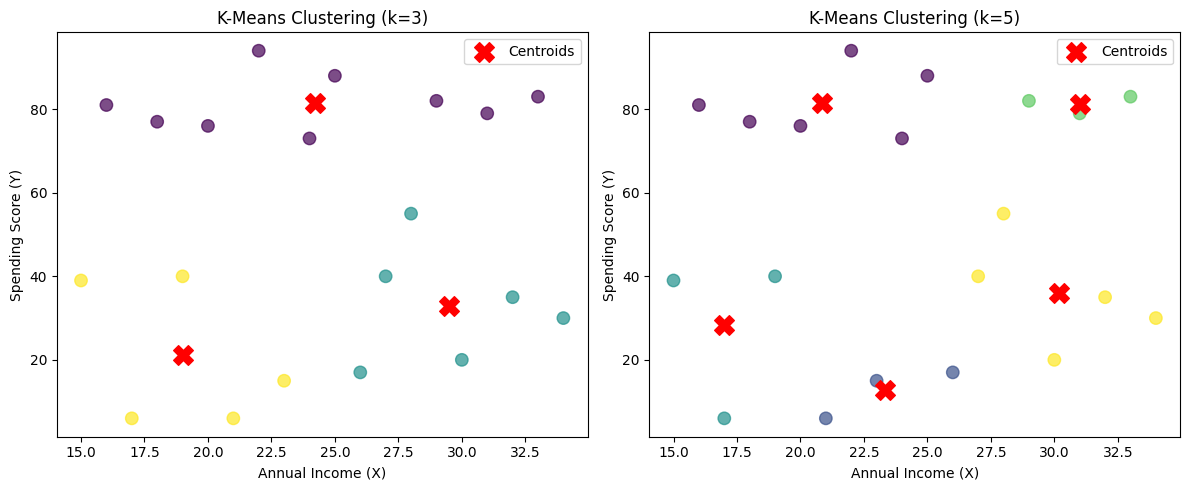

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.DataFrame.from_dict(customers, orient='index')

# =============================
# 1. Noramlize Dataset
# =============================
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns, index=df.index)

# =============================
# 2. Use K=3, K=5
# =============================
k_values = [3, 5]
kmeans_models = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_scaled[f'Cluster_k{k}'] = kmeans.fit_predict(df_scaled)
    kmeans_models[k] = kmeans

# =============================
# 3. Scatterplot
# =============================
plt.figure(figsize=(12, 5))

for i, k in enumerate(k_values, 1):
    plt.subplot(1, 2, i)
    plt.scatter(
        df["Annual Income"], df["Spending Score"],
        c=df_scaled[f'Cluster_k{k}'], cmap='viridis', s=80, alpha=0.7
    )
    centers = scaler.inverse_transform(kmeans_models[k].cluster_centers_[:, :2])

    plt.scatter(
        centers[:, 0], centers[:, 1],
        c='red', s=200, marker='X', label='Centroids'
    )
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("Annual Income (X)")
    plt.ylabel("Spending Score (Y)")
    plt.legend()

plt.tight_layout()
plt.show()


Task 2: Use the Elbow Method
  
  (1)Compute WCSS (within-cluster sum of squares) for k=1,2,3,4,5,6.
  
  (2)Plot the elbow curve and determine the “optimal” number of clusters.

The WCSS for k=1 is 40.00
The WCSS for k=2 is 24.38
The WCSS for k=3 is 13.79
The WCSS for k=4 is 7.61
The WCSS for k=5 is 6.27
The WCSS for k=6 is 5.36


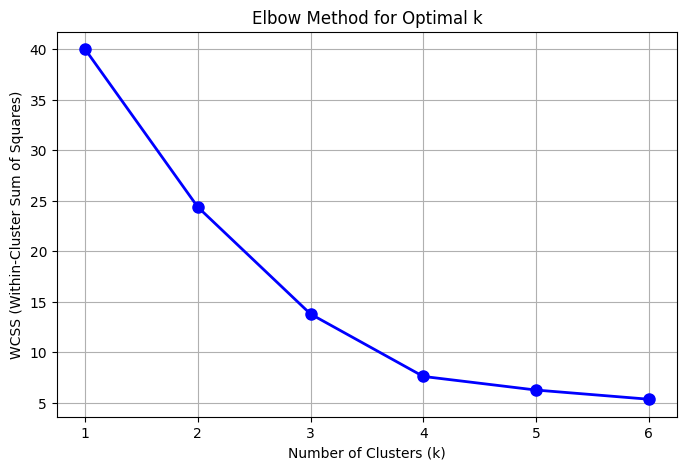

In [ ]:
# =============================
#  1. Elbow Method
# =============================
wcss = []  # Within-Cluster Sum of Squares
K = range(1, 7)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[["Annual Income", "Spending Score"]])
    wcss.append(kmeans.inertia_)
for i, value in enumerate(wcss, start=1):
    print(f"The WCSS for k={i} is {value:.2f}")

# =============================
#  2. Plot the curve
# =============================
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=8)
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()



Task3: Analyze Sensitivity to Initialization

(1)Run K-Means with the same k but different random seeds.

(2)Compare cluster assignments and WCSS.

(3)Discuss why results may vary.(Discussion showed on report)


🔁 Sensitivity to Initialization Analysis (k=4)

Seed =  1 → WCSS = 11.64, Labels = [2 2 3 2 2 2 3 2 0 1 1 0 0 1 1 0 1 0 1 0]
Seed = 21 → WCSS = 10.55, Labels = [0 1 0 1 0 1 3 1 3 1 1 3 3 2 2 3 2 2 2 2]
Seed = 41 → WCSS = 10.84, Labels = [1 0 3 0 1 0 3 0 3 0 0 3 2 2 2 2 2 2 2 2]
Seed = 61 → WCSS = 12.51, Labels = [1 1 1 1 1 3 2 3 2 3 3 2 2 3 0 2 0 2 0 2]
Seed = 81 → WCSS = 10.53, Labels = [1 0 1 0 1 0 1 0 1 0 0 1 3 3 2 3 2 3 2 3]


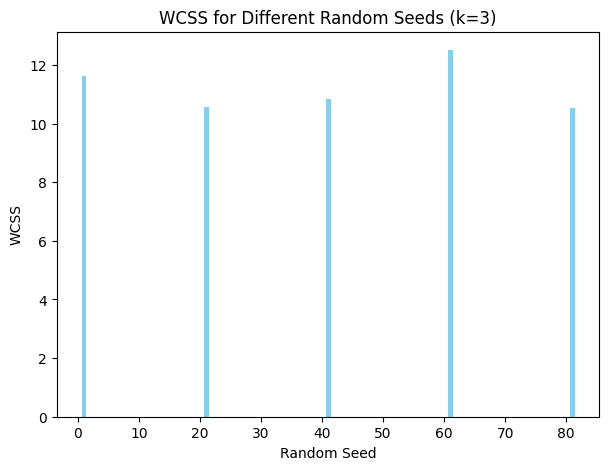

In [ ]:
# =============================
# 1. Sensitivity to Initialization
# =============================

k = 3  #Because WCSS decrement is around: 15.62 10.59 6.18 1.34 0.91, in my opinion, 6 is still large compare to 1.3. Then I used 4 as k value.
random_states = [1, 21, 41, 61, 81]
results = {}

print("\n🔁 Sensitivity to Initialization Analysis (k=4)\n")

for seed in random_states:
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=seed)
    labels = kmeans.fit_predict(df_scaled[["Annual Income", "Spending Score"]])
    wcss_value = kmeans.inertia_
    results[seed] = {
        "labels": labels,
        "wcss": wcss_value
    }
    print(f"Seed = {seed:>2} → WCSS = {wcss_value:.2f}, Labels = {labels}")


# =============================
# 2. Compare WCSS visually
# =============================
plt.figure(figsize=(7, 5))
plt.bar(results.keys(), [results[s]["wcss"] for s in results], color="skyblue")
plt.title(f"WCSS for Different Random Seeds (k={k})")
plt.xlabel("Random Seed")
plt.ylabel("WCSS")
plt.show()



Task4: Visualize Clustering Limitations

For the second synthetic dataset below with two interlocking circles (non-spherical
clusters)  

(1)Plot the scatter plot of this 30-point dataset (with true labels colored in blue
and red; True label of 1: red; and True label of 0: blue)

(2)Apply K-Means with k=2.

(3)Visualize why K-Means fails in this case.

(4)Discuss why spherical assumption makes K-Means unsuitable for complex
shaped clusters.(Discussion showed on report)

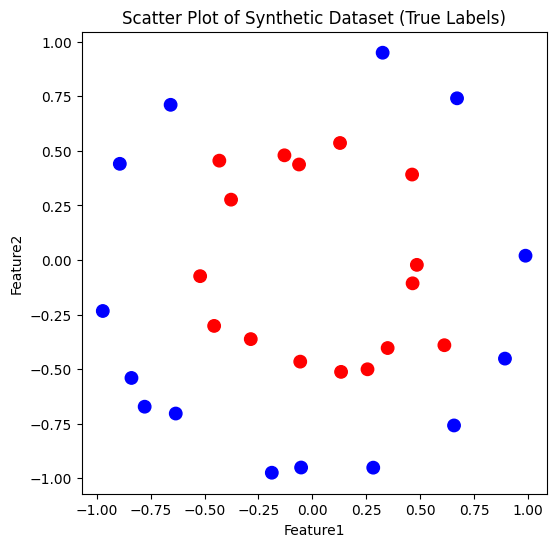

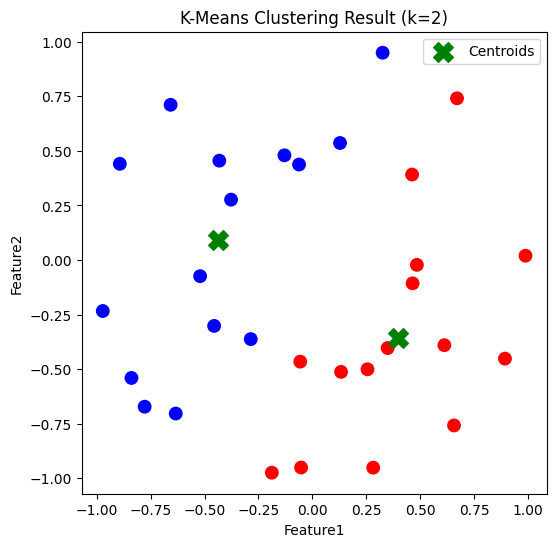

In [ ]:
# =========================
# Load the dataset
# =========================
data = {
    "Feature1": [0.1331,0.4648,-0.5205,0.4625,-0.9720,-0.8390,0.3491,-0.4556,0.2823,0.9885,
                 -0.0522,-0.4315,0.1283,-0.0563,0.4846,-0.1881,0.3259,-0.8930,-0.7778,0.6570,
                 -0.0618,0.6709,-0.6336,-0.2857,-0.1296,0.2557,-0.6574,0.8932,-0.3771,0.6122],
    "Feature2": [-0.5126,-0.1070,-0.0741,0.3913,-0.2337,-0.5404,-0.4034,-0.3020,-0.9513,0.0195,
                 -0.9507,0.4549,0.5358,-0.4657,-0.0224,-0.9745,0.9493,0.4404,-0.6721,-0.7580,
                 0.4373,0.7405,-0.7034,-0.3625,0.4794,-0.5007,0.7107,-0.4518,0.2763,-0.3904],
    "TrueLabel": [1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1]
}
df = pd.DataFrame(data)

# =========================
# 1. Scatter plot with true labels
# =========================
plt.figure(figsize=(6,6))
colors = df["TrueLabel"].map({0:"blue",1:"red"})
plt.scatter(df["Feature1"], df["Feature2"], c=colors, s=80)
plt.title("Scatter Plot of Synthetic Dataset (True Labels)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# =========================
# 2. Apply K-Means with k=2
# =========================
kmeans = KMeans(n_clusters=2, random_state=42)
df["KMeansLabel"] = kmeans.fit_predict(df[["Feature1","Feature2"]])

# =========================
# 3. Visualized K-Means with k=2 (scatterplot)
# =========================
plt.figure(figsize=(6,6))
colors_pred = df["KMeansLabel"].map({0:"blue",1:"red"})
plt.scatter(df["Feature1"], df["Feature2"], c=colors_pred, s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="green", s=200, marker="X", label="Centroids")
plt.title("K-Means Clustering Result (k=2)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

# =========================
# 4. Discussion
# =========================
"""
The clustering algorithm is assuming the clusters are spherical.
(points are directly surrounding to nearest centroids; different centroids didn't share the surrounding areas)
If it is not as circular shape, like a donut shape, eclispe shape, or triangle shape, then it will be unsuitable to represent characteristics of dataset.
We could use other models for this situation, like classification.
"""